In [65]:
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

import pandas as pd
import random
import os
from tabulate import tabulate
#np.set_printoptions(threshold=np.nan)
#%matplotlib inline


# Variables

die_roll = 0
die_type = 6
die_payout = die_type
player_bet = 0
player_pick = 0
player_win = 0
player_purse = 100
round = 0
counter = 0
rounds_played = 1000


# Keeping track and initialize lists

#turn_list.clear()
#purse_list.clear()
#bet_list.clear()
#win_loss_list.clear()
#rolled_number_list.clear()
#picked_number_list.clear()

round_list = [0]
turn_list = [0]
purse_list =[100]
bet_list = [0]
win_loss_list = [0]
rolled_number_list = [0]
picked_number_list = [0]
winner_list = [0]

track = {'Round':round_list,'Turns':turn_list,'Purse':purse_list, 'Bet':bet_list, 'Win_Loss':win_loss_list, 'Rolled_Number':rolled_number_list,
'Picked_Number':picked_number_list, 'Winner':winner_list}

for j in range(rounds_played):
    #np.random.seed(11111111)
    round = round +1
    counter = 0
    player_purse = 100

    while player_purse > 0:
        round_list.append(round)
        counter = counter +1
        turn_list.append(counter)
        die_roll = random.randint(1,6)
        rolled_number_list.append(die_roll)
        player_bet = random.randint(0,player_purse)
        bet_list.append(player_bet)
        player_pick = random.randint(1,6)
        picked_number_list.append(player_pick)
        if player_pick == die_roll:
            winner_list.append(True)
            player_win = player_bet * die_payout
        else:
            player_win = -1 * player_bet
            winner_list.append(False)
        win_loss_list.append(player_win)
        player_purse = player_purse + player_win
        purse_list.append(player_purse)
        if player_purse == 0:
            break
#Tabular Results 
header = track.keys()
#print(tabulate(track, headers=['Turn', 'Purse', 'Bet', 'Win/Loss', 'Rolled_Number', 'Picked_Number']))
#print(tabulate(track, headers=header))

df = pd.DataFrame.from_dict(track)
print(df)

round_high = df.groupby('Round')['Purse'].max()
tops = round_high.max()
high_round = round_high[round_high == tops].index[0]
newdf1 = df.loc[:,["Round","Purse","Win_Loss","Turns"]]
newdf2 = newdf1.loc[newdf1["Round"] == high_round]



      Round  Turns  Purse  Bet  Win_Loss  Rolled_Number  Picked_Number Winner
0         0      0    100    0         0              0              0      0
1         1      1      8   92       -92              1              6  False
2         1      2      4    4        -4              2              6  False
3         1      3      0    4        -4              4              3  False
4         2      1     20   80       -80              6              2  False
5         2      2      4   16       -16              5              4  False
6         2      3      4    0         0              6              6   True
7         2      4      0    4        -4              6              2  False
8         3      1     32   68       -68              4              1  False
9         3      2      7   25       -25              6              5  False
10        3      3      4    3        -3              4              3  False
11        3      4      0    4        -4              3         

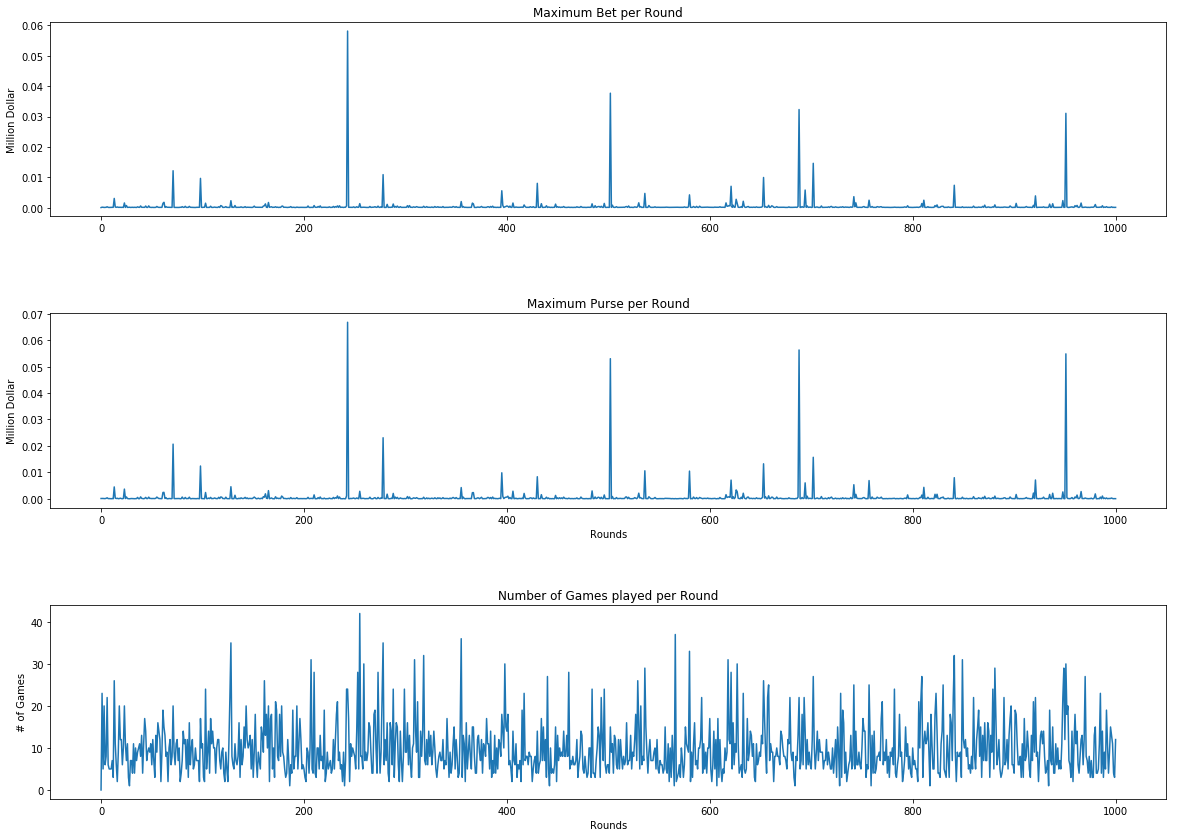

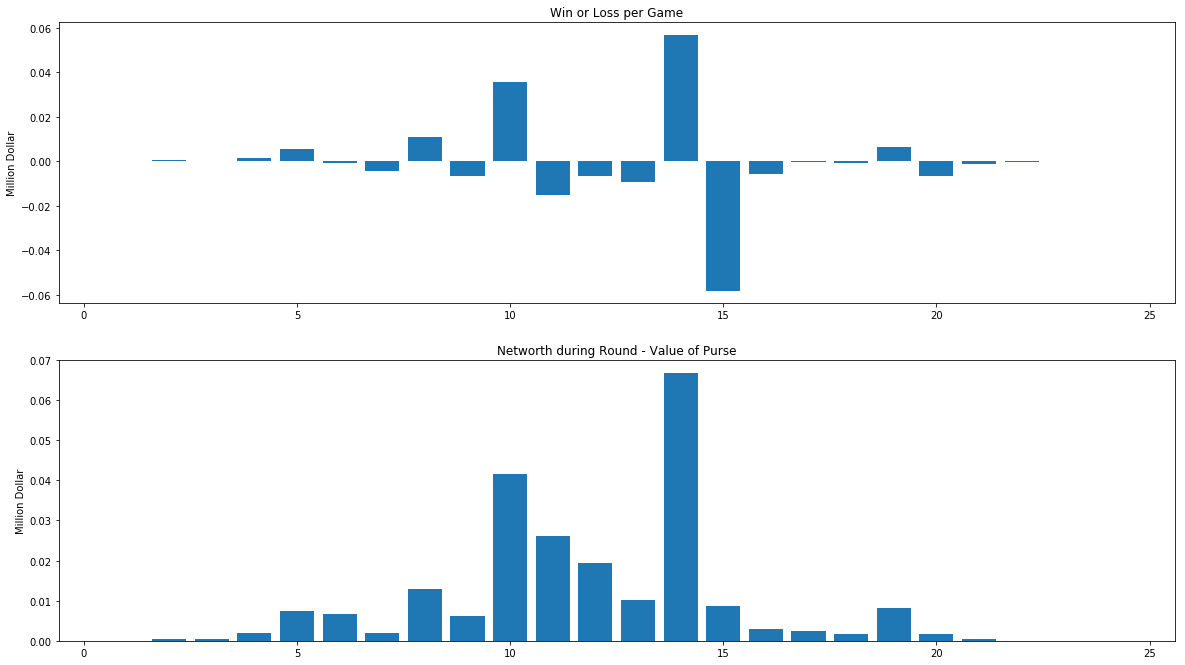

In [2]:
x1 = df["Round"].unique()
x2 = list(newdf2["Turns"])

y1 = df.groupby("Round")["Bet"].max() / 1000000
y2 = df.groupby("Round")["Purse"].max() / 1000000
y3 = df.groupby("Round")["Turns"].max()
y4 = newdf2["Win_Loss"] / 1000000
y5 = newdf2["Purse"] / 1000000


f = plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.5)
#y1.ticklabel_format(style='plain')

plt.subplot(5,1,1)
plt.plot(x1,y1)
plt.title("Maximum Bet per Round")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,2)
plt.plot(x1,y2)
plt.title("Maximum Purse per Round")
plt.ylabel("Million Dollar")
plt.xlabel("Rounds")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,3)
plt.plot(x1,y3)
plt.title("Number of Games played per Round")
plt.ylabel("# of Games")
plt.xlabel("Rounds")

f = plt.figure(figsize=(20,30))|

plt.subplot(5,1,4)
plt.bar(x2,y4)
plt.title("Win or Loss per Game")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,5)
plt.bar(x2,y5)
plt.title("Networth during Round - Value of Purse")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')



plt.show()


In [42]:
list(df.loc[df['Round'] == round,'Winner'].values[::])


TypeError: 'tuple' object is not callable

2


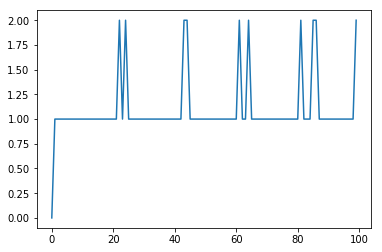

In [63]:
streak = 0
max_streaks = 0
list = [0]
my_rounds = range(1,101)
for round in range(1,100):
    x = df.loc[df['Round'] == round,'Winner'].values[::]
    for i in x:
        if i == True:
            streak = streak + 1
            max_streaks = streak
        elif i == False:
            streak = 0
    list.append(max_streaks)
    streak = 0
print(max(list))

newdf = pd.DataFrame()
newdf['Longest_Streak'] = list
newdf['Round'] = my_rounds
plt.plot(newdf['Longest_Streak'])